In [1]:
# Script to visualize the attention activations
import matplotlib.pyplot as plt
import numpy as np
import pickle # import the pickle module
from pickle import UnpicklingError # import the UnpicklingError module

In [63]:
# read the log file and load the attention matrix using pickle
log_file = open('logs/attention_log.pkl', 'rb') # open the file in read binary mode
data = []
try:
    while True:
        p = pickle.load(log_file) # load the data as a dictionary
        data.append(p)
except EOFError: # break when there is no more data to read
    pass
except UnpicklingError:
    pass
log_file.close() # close the file

In [64]:
len(data)

100

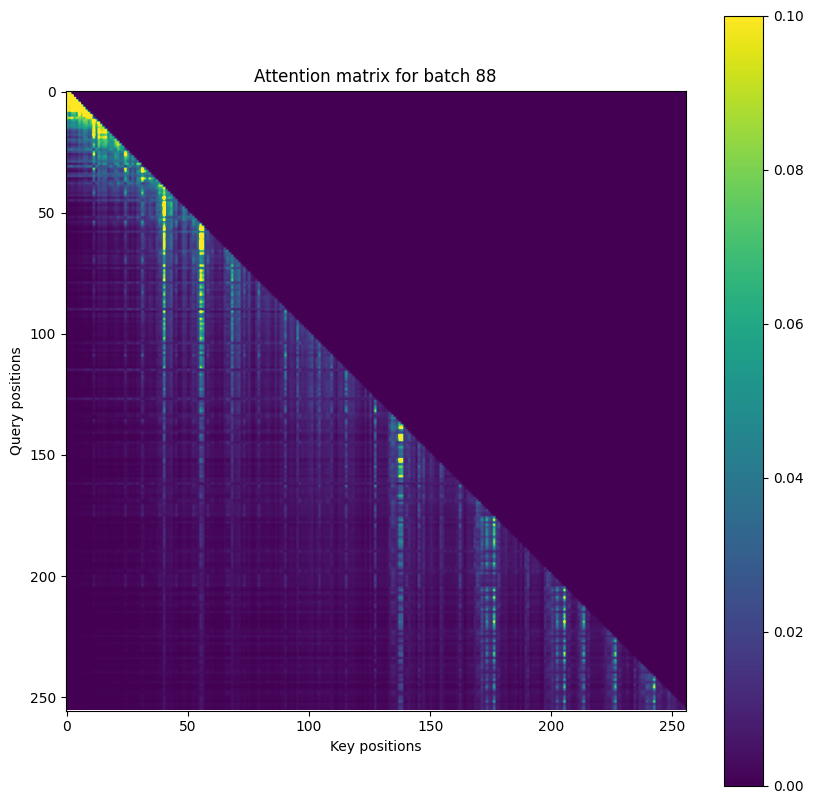

In [65]:
# plot the attention matrix for each batch and each head
# sample random batches
random_batches = np.random.randint(0, len(data), size=1)
for i in random_batches:
    plt.figure(figsize=(10, 10))
    plt.title(f'Attention matrix for batch {i+1}')
    mat = np.squeeze(data[i]['att_matrix'], axis=0) # remove the batch dimension
    plt.imshow(mat, cmap='viridis', vmin=0, vmax=0.1)
    plt.colorbar()
    plt.xlabel('Key positions')
    plt.ylabel('Query positions')
    # plt.savefig(f'logs/images/attention_batch_{i+1}.png')
    plt.show()